# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Dewi Titania Randa
- **Email:** tiranda123@gmail.com
- **ID Dicoding:** dewititania

## Menentukan Pertanyaan Bisnis

- Pada jam berapa saja kah minat rental sepedanya sangat tinggi?
- Bagaimana kah jumlah rental sepeda perhari pada saat cuaca yang berbeda?

## Import Semua Packages/Library yang Digunakan

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Data Wrangling

### Gathering Data

In [26]:
day_csv_path = "day.csv"
hour_csv_path = "hour.csv"

df_day = pd.read_csv(day_csv_path)
df_hour = pd.read_csv(hour_csv_path)

In [27]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [28]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

ditahap ini kita akan mengecek apakah ada duplikasi, missing value, dan tipe datanya

In [29]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [30]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [31]:
df_hour.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [32]:
df_day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [33]:
df_hour.duplicated().sum()

0

In [34]:
df_day.duplicated().sum()

0

In [35]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [36]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

In [37]:
df_hour.dropna(axis=0, inplace=True)
df_day.dropna(axis=0, inplace=True)

Mengidentifikasi nilai

In [48]:
df_day.weathersit.value_counts()

1    463
2    247
3     21
Name: weathersit, dtype: int64

In [49]:
df_hour.weathersit.value_counts()

1    11413
2     4544
3     1419
4        3
Name: weathersit, dtype: int64

drop column yang tidak dibutuhkan

In [50]:
drop_col = ['yr', 'mnth', 'dteday']

for i in df_day.columns:
  if i in drop_col:
    df_day.drop(labels=i, axis=1, inplace=True)

df_day.head()

,instant,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [60]:
drop_col = ['yr', 'mnth', 'dteday']

for i in df_hour.columns:
  if i in drop_col:
    df_hour.drop(labels=i, axis=1, inplace=True)

df_hour.head()

,instant,season,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Explore ...

In [61]:
df_hour.describe(include="all")

,instant,season,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [62]:
df_day.describe(include="all")

,instant,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Kita buatkan hubungan antara cuacanya dengan jumlah rentalnya

In [63]:
kolom_cuaca = ["holiday","weekday","workingday","weathersit","temp","atemp","season", "windspeed",  "cnt"]
kolerasi = df_day[kolom_cuaca].corr()
print(kolerasi)

             holiday   weekday  workingday  weathersit      temp     atemp  \
holiday     1.000000 -0.101960   -0.253023   -0.034627 -0.028556 -0.032507   
weekday    -0.101960  1.000000    0.035790    0.031087 -0.000170 -0.007537   
workingday -0.253023  0.035790    1.000000    0.061200  0.052660  0.052182   
weathersit -0.034627  0.031087    0.061200    1.000000 -0.120602 -0.121583   
temp       -0.028556 -0.000170    0.052660   -0.120602  1.000000  0.991702   
atemp      -0.032507 -0.007537    0.052182   -0.121583  0.991702  1.000000   
season     -0.010537 -0.003080    0.012485    0.019211  0.334315  0.342876   
windspeed   0.006292  0.014282   -0.018796    0.039511 -0.157944 -0.183643   
cnt        -0.068348  0.067443    0.061156   -0.297391  0.627494  0.631066   

              season  windspeed       cnt  
holiday    -0.010537   0.006292 -0.068348  
weekday    -0.003080   0.014282  0.067443  
workingday  0.012485  -0.018796  0.061156  
weathersit  0.019211   0.039511 -0.297391  

In [64]:
all_df = pd.merge(
    left=df_hour,
    right=df_day,
    how="left",
    left_on="instant",
    right_on="instant"
)
all_df.head()

,instant,season_x,hr,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,atemp_x,hum_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,1,0,0,6,0,1,0.24,0.2879,0.81,...,6.0,0.0,2.0,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985.0
1,2,1,1,0,6,0,1,0.22,0.2727,0.80,...,0.0,0.0,2.0,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801.0
2,3,1,2,0,6,0,1,0.22,0.2727,0.80,...,1.0,1.0,1.0,0.196364,0.189405,0.437273,0.248309,120.0,1229.0,1349.0
3,4,1,3,0,6,0,1,0.24,0.2879,0.75,...,2.0,1.0,1.0,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562.0
4,5,1,4,0,6,0,1,0.24,0.2879,0.75,...,3.0,1.0,1.0,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600.0


## Visualization & Explanatory Analysis

### Pertanyaan 1:

1. jam yang minat sewanya tinggi

<ipython-input-65-66bd946577ca>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="hr", y="cnt_x", data=all_df, ci=None)


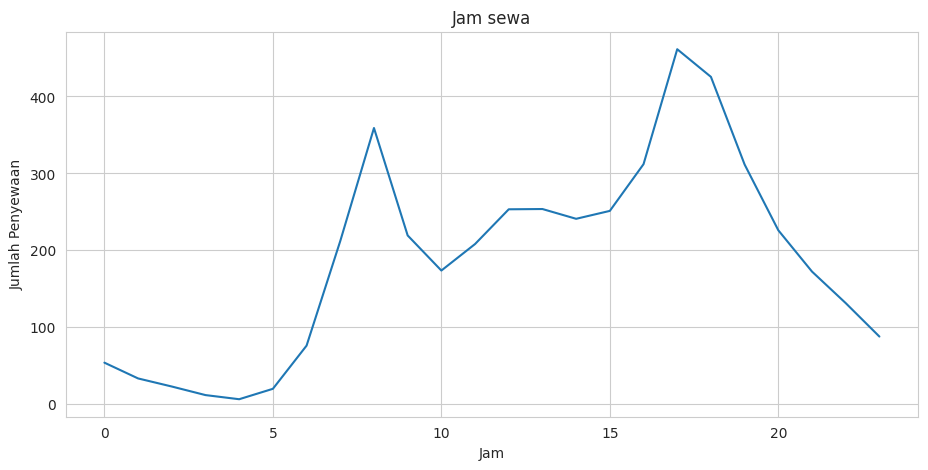

In [65]:
sns.set_style("whitegrid")
plt.figure(figsize=(11, 5))
sns.lineplot(x="hr", y="cnt_x", data=all_df, ci=None)
plt.title("Jam sewa")
plt.xlabel("Jam")
plt.ylabel("Jumlah Penyewaan")
plt.show()

### Pertanyaan 2:

1. Bagaimanakah jumlah rental sepeda pada saat cuaca yang berbeda?

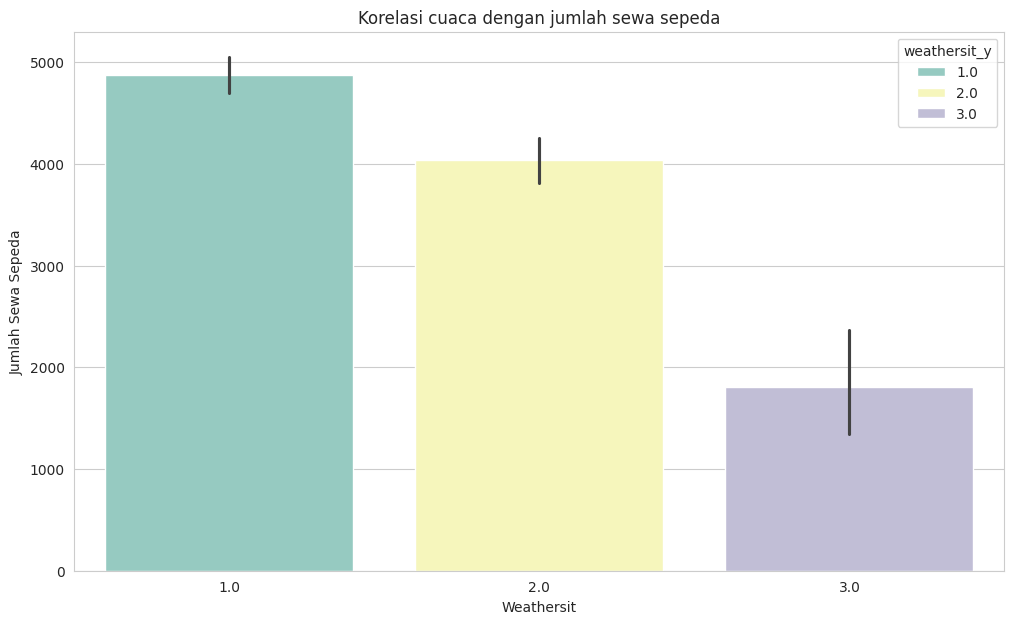

In [66]:
plt.figure(figsize=(12, 7))
sns.barplot(x="weathersit_y", y="cnt_y", hue="weathersit_y", data=all_df, palette="Set3")
plt.title("Korelasi cuaca dengan jumlah sewa sepeda")
plt.xlabel("Weathersit")
plt.ylabel("Jumlah Sewa Sepeda")
plt.show()

## Conclusion

- Conclution pertanyaan 1
Jam dengan Sewa tertinggi ada pada sekitaran jam 4-6 sore

- Conclution pertanyaan 2
 pada barplotnya kita bisa liat bahwa jumlah rental pada saat cuacanya clear (1) jumlah rentalnya itu lebih banyak. Saat cuacanya berkabut atau berembun (2) jumlah rentalnya menurun sedikit. Saat hujan atau bersalju sedikit (3) jumlah rentalnya akan menurun banyak.

In [68]:
all_df.to_csv("all_data.csv", index=False)